CAR PREDICTION MODEL

Importing dependecies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


DATA COLLECTION AND PREPROCESSING

In [3]:
df = pd.read_csv("car data.csv")



In [88]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [90]:
unique_car_names = df['Car_Name'].nunique()

print(f'There are {unique_car_names} different car names.')

There are 98 different car names.


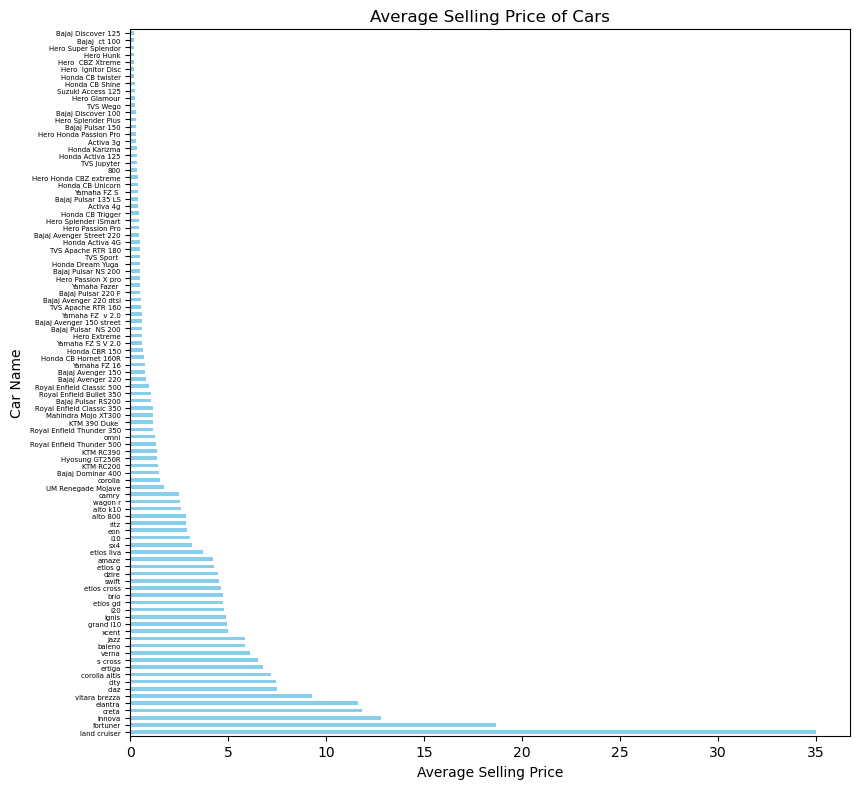

In [99]:
avg_prices = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot the car names and their average prices
plt.figure(figsize=(12, 8))
avg_prices.plot(kind='barh', color='skyblue')
plt.xlabel('Average Selling Price')
plt.ylabel('Car Name')
plt.title('Average Selling Price of Cars')
plt.tight_layout()
plt.yticks(rotation=0, fontsize=5)  # Rotate to 0 degrees if you want horizontal labels
plt.tight_layout()

# Add more space between the labels
plt.subplots_adjust(left=0.2, right=0.8)

plt.show()


Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [57]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187   0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647   0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440415    0.166801   1.000000   
Seller_Type   -0.039896      -0.550724      -0.512030   -0.101419  -0.352415   
Transmission  -0.000394       0.367128       0.348715    0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216  -0.055705   

               Seller_Type  Transmission     Owner  
Year             -0.039896     -0.000394 -0.182104  
Selling_Price    -0.550724      0.367128 -0.088344  
Present_Price    -0.512030      0.348715  0.008057  
Kms_Driven       -0.101419      0.162510  0.089216  
Fuel_Type     

<Axes: >

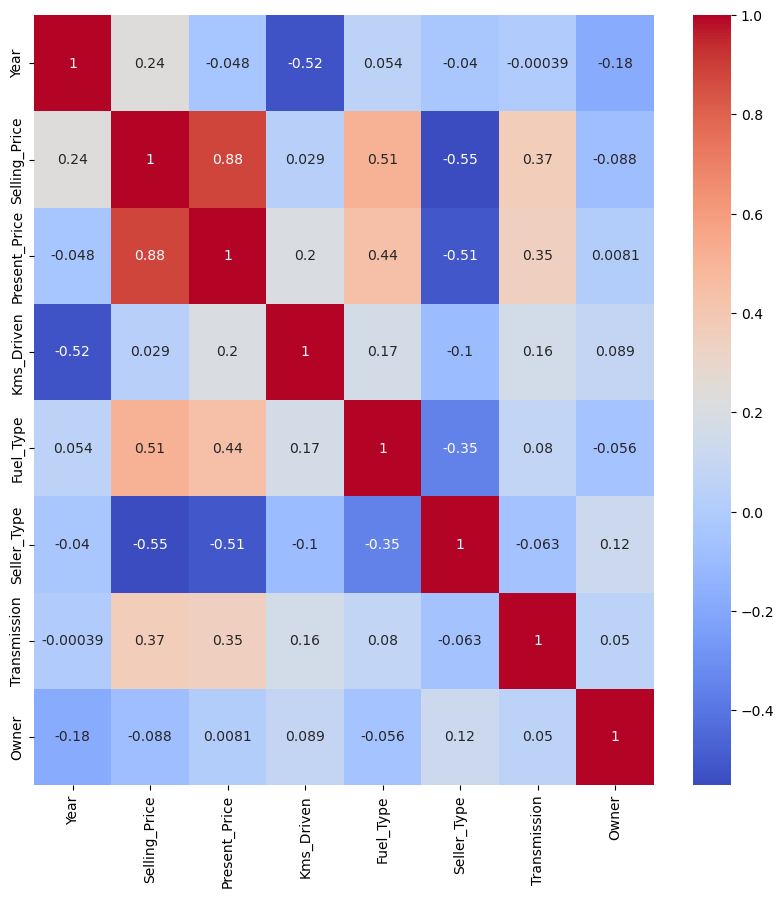

In [58]:
correlation_matrix = numeric_df.corr()
fig, ax  =plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot =True , ax=ax, cmap ="coolwarm")

<Axes: >

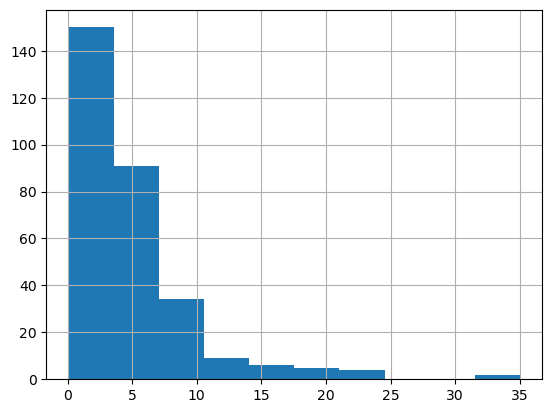

In [63]:
df['Selling_Price'].hist()

In [79]:
#encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Deal':0,'Individual':1}},inplace=True)
#encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
x = df.drop(['Car_Name','Selling_Price'],axis =1)
y=df['Selling_Price']

In [18]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.1, random_state =2)

MODEL TRAINING

1.LINEAR REGRESSION

In [12]:
#loading the LINEAR REGRESSION model
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [20]:
#prediction on Training data
Training_data_prediction = lin_reg_model.predict(x_train)

In [22]:
# R squared Error 
error_score = metrics.r2_score(y_train,Training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493716


In [31]:
print("Accuracy: ", lin_reg_model.score(x_train, y_train)*100)

Accuracy:  87.99451660493716


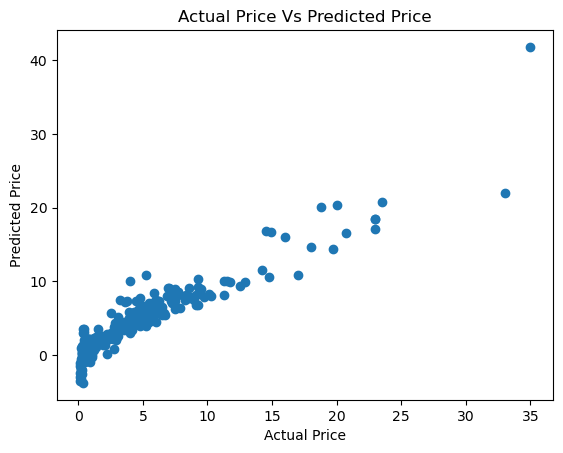

In [27]:
plt.scatter(y_train,Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()
            
        

In [28]:
#prediction on Test data
Test_data_prediction = lin_reg_model.predict(x_test)

In [29]:
# R squared Error 
error_score = metrics.r2_score(y_test,Test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.836576671502587


In [30]:
print("Accuracy: ", lin_reg_model.score(x_test, y_test)*100)

Accuracy:  83.6576671502587


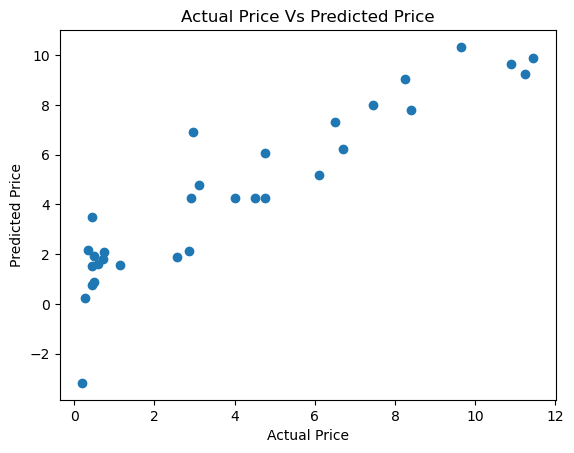

In [32]:
plt.scatter(y_test,Test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()
            
        

Lasso Regression

In [33]:
#loading the Lasso REGRESSION model
lasso_reg_model = Lasso()

In [34]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [49]:
# prediction on Training data
Training_data_prediction = lasso_reg_model.predict(x_train)

In [50]:
# R squared Error
error_score = metrics.r2_score(y_train, Training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Visualize the actual prices and Predicted prices

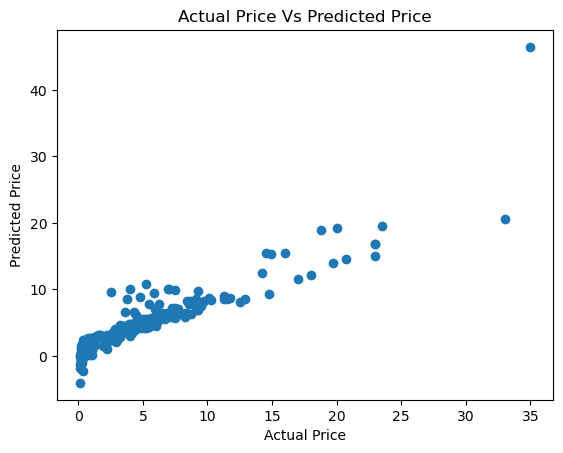

In [51]:
plt.scatter(y_train,Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [54]:
# prediction on Test data
Test_data_prediction = lasso_reg_model.predict(x_test)

In [55]:
# R squared Error
error_score = metrics.r2_score(y_test, Test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


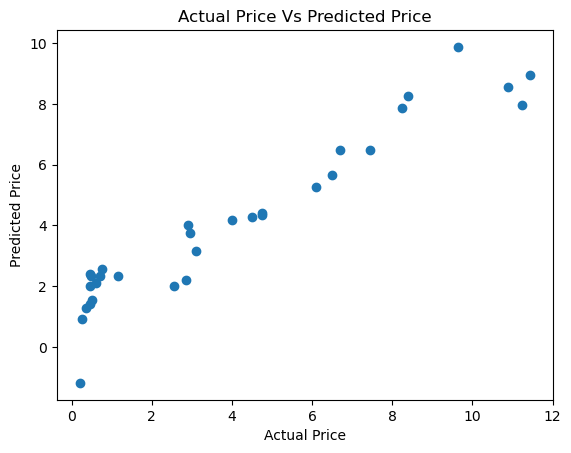

In [56]:
plt.scatter(y_test,Test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()